<a href="https://colab.research.google.com/github/gauravsinghiitb/LS_ML_22b0668/blob/main/Copy_of_linear_regression_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


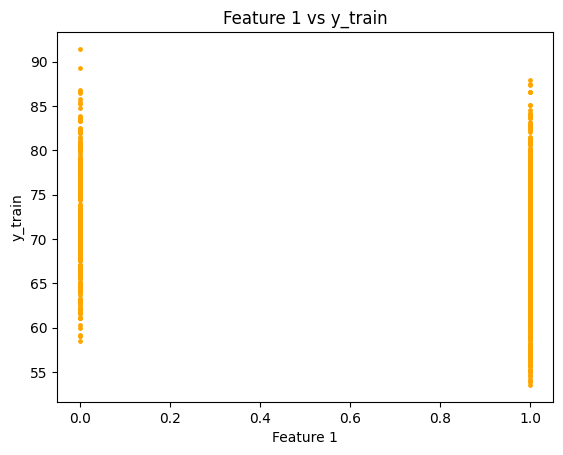

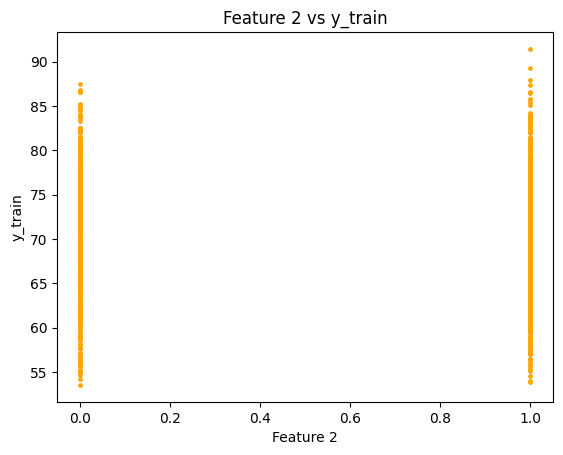

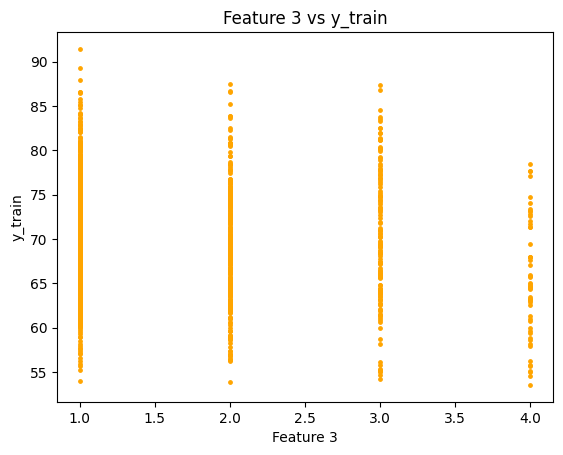

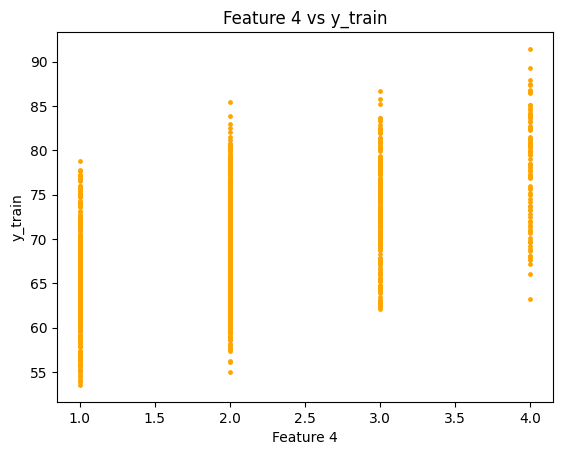

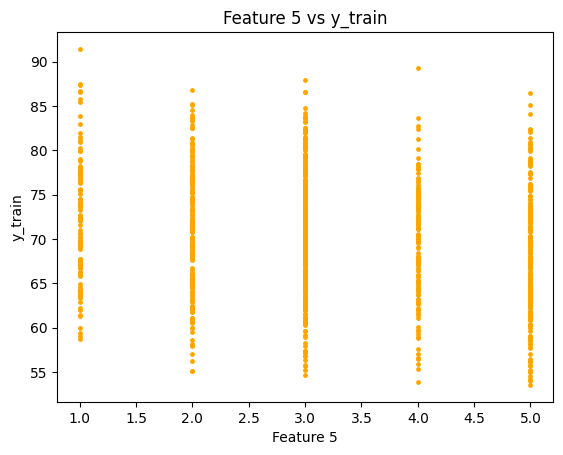

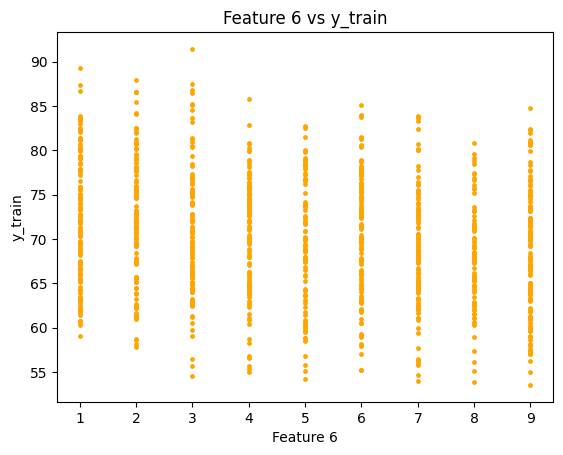

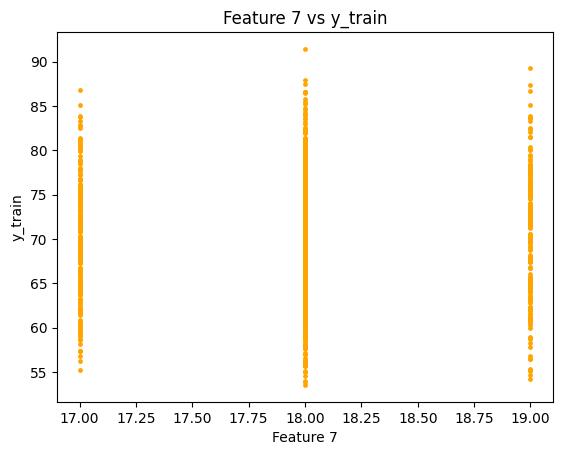

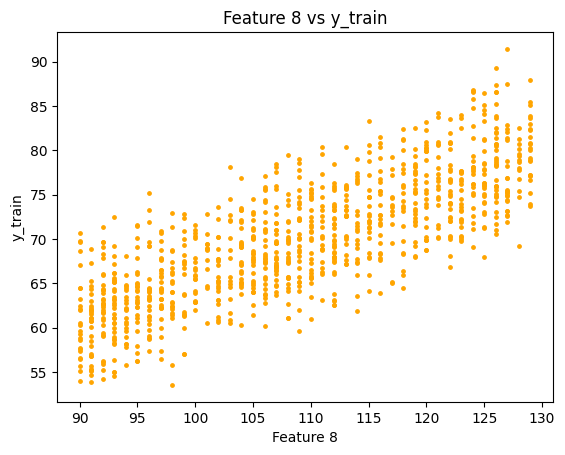

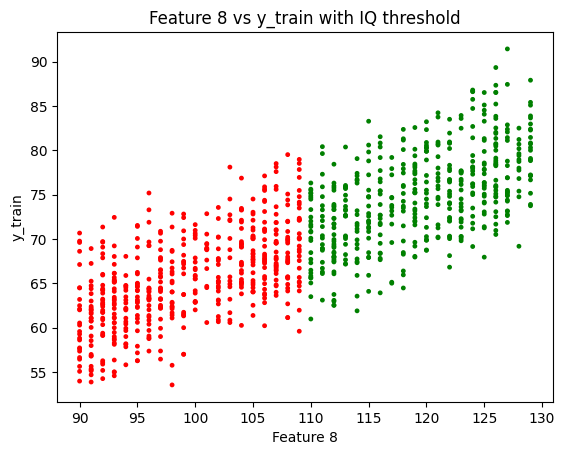

[[0 1 2 ... 18 118 1]
 [1 1 2 ... 19 107 0]
 [1 1 3 ... 18 108 0]
 ...
 [1 1 2 ... 17 123 1]
 [1 0 1 ... 17 104 0]
 [1 1 1 ... 18 128 1]]


In [14]:
data = pd.read_excel('/content/drive/MyDrive/LS2024/ML/Training data.xlsx')
x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)

# above_average function(new feature)
def above_average(x):
    return np.where(x > 109, 1, 0)

# Feature transformation function
# categorical features: "internet" and "sex"
def feature_changing(x_train):
    le = LabelEncoder()
    for i in range(x_train.shape[1]):
        if isinstance(x_train[0, i], str):
            x_train[:, i] = le.fit_transform(x_train[:, i])

    # Add a feature indicating whether the IQ is above average (109)
    avg_iq = 109
    above_avg_iq = (x_train[:, 7] > avg_iq).astype(int)  # Feature 8
    x_train = np.hstack((x_train, above_avg_iq.reshape(-1, 1)))

    return x_train

x_train = feature_changing(x_train)


# y_train with different features
a = x_train.shape[1] - 1
for i in range(a):
    plt.scatter(x_train[:, i], y_train, color='orange', s=6)
    plt.title(f'Feature {i+1} vs y_train')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('y_train')
    plt.show()

# 8th feature (green denotes iq>109 , red denotes iq<109)
colors = ['red' if value == 0 else 'green' for value in x_train[:, 8]]
plt.scatter(x_train[:, 7], y_train, color=colors, s=6)
plt.title('Feature 8 vs y_train with IQ threshold')
plt.xlabel('Feature 8')
plt.ylabel('y_train')
plt.show()

print(x_train)




In [15]:
# Z-score normalization function
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean) / x_std
    return x_train, x_std, x_mean

In [16]:
def cost(x_train, y_train, w, b):
    m = x_train.shape[0]
    predictions = np.dot(x_train, w) + b
    errors = predictions - y_train
    loss = (1 / (2 * m)) * np.sum(errors ** 2)
    return loss

In [17]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01):
    m = x_train.shape[0]
    predictions = np.dot(x_train, w) + b
    errors = predictions - y_train
    dj_dw = (1 / m) * np.dot(x_train.T, errors)
    dj_db = (1 / m) * np.sum(errors)
    w -= learning_rate * dj_dw
    b -= learning_rate * dj_db
    return w, b

In [18]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('/content/drive/MyDrive/LS2024/ML/Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('/content/drive/MyDrive/LS2024/ML/Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
